In [109]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import cifar100

In [6]:
(x_train,y_train), (x_test,y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 150s 1us/step


In [7]:
x_train[0].shape

(32, 32, 3)

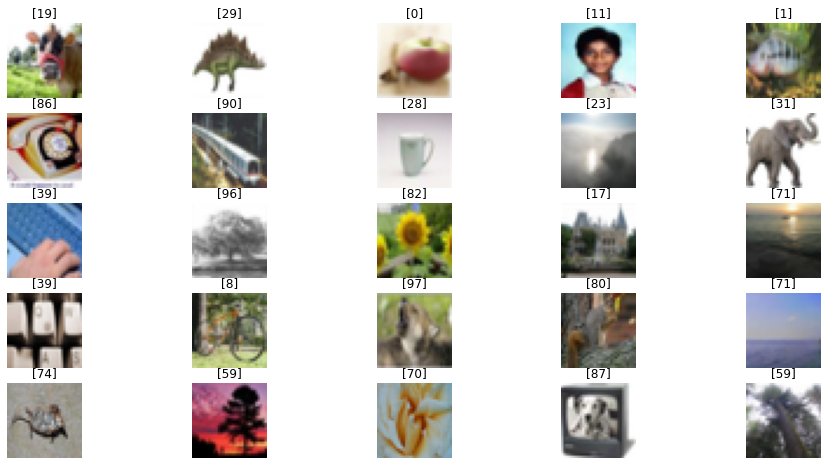

In [10]:
fig= plt.figure(figsize=(16,8))

rows=5
columns=5
for i in range(25):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]}')

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [63]:
x_train[0].max()
x_train/255
x_test/255
x_test.shape

(10000, 32, 32, 3)

In [64]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [66]:
from tensorflow.keras.utils import to_categorical

In [67]:
y_cat_train = to_categorical(y_train, 100)
y_cat_test = to_categorical(y_test, 100)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [76]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (32,32,3), activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output layer

model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 32)        25632     
                                                                 
 conv2d_13 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                  

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [82]:
model.fit(x_train, y_cat_train,epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 102s 63ms/step - loss: 4.4466 - accuracy: 0.0357 - val_loss: 4.0955 - val_accuracy: 0.0734
Epoch 2/15
1563/1563 [==============================] - 97s 62ms/step - loss: 3.9697 - accuracy: 0.0937 - val_loss: 3.8563 - val_accuracy: 0.1043
Epoch 3/15
1563/1563 [==============================] - 97s 62ms/step - loss: 3.7419 - accuracy: 0.1266 - val_loss: 3.6706 - val_accuracy: 0.1435
Epoch 4/15
1563/1563 [==============================] - 100s 64ms/step - loss: 3.5530 - accuracy: 0.1597 - val_loss: 3.5889 - val_accuracy: 0.1616
Epoch 5/15
1563/1563 [==============================] - 98s 63ms/step - loss: 3.3937 - accuracy: 0.1856 - val_loss: 3.5133 - val_accuracy: 0.1749
Epoch 6/15
1563/1563 [==============================] - 102s 65ms/step - loss: 3.2649 - accuracy: 0.2106 - val_loss: 3.4092 - val_accuracy: 0.1876
Epoch 7/15
1563/1563 [==============================] - 97s 62ms/step - loss: 3.1569 - accuracy: 0.2283 - val_loss: 3.471

In [83]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

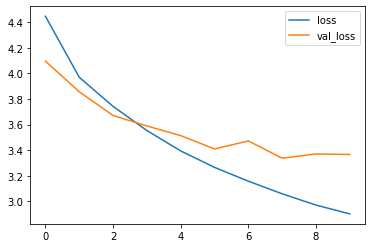

In [84]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

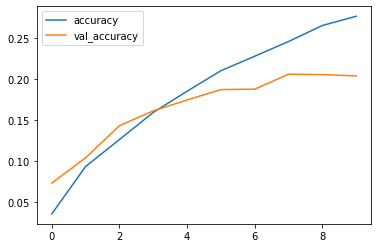

In [85]:
metrics[['accuracy', 'val_accuracy']].plot()

In [86]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 4s 12ms/step - loss: 3.3656 - accuracy: 0.2043


[3.3656351566314697, 0.20430000126361847]

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
prediction = model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [89]:
predictions = [np.argmax(x, axis=0) for x in prediction]

In [90]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.28      0.33       100
           1       0.20      0.20      0.20       100
           2       0.13      0.15      0.14       100
           3       0.06      0.07      0.07       100
           4       0.11      0.04      0.06       100
           5       0.09      0.13      0.10       100
           6       0.26      0.20      0.22       100
           7       0.16      0.16      0.16       100
           8       0.12      0.34      0.18       100
           9       0.34      0.32      0.33       100
          10       0.14      0.08      0.10       100
          11       0.10      0.03      0.05       100
          12       0.28      0.13      0.18       100
          13       0.10      0.09      0.09       100
          14       0.10      0.11      0.10       100
          15       0.09      0.08      0.08       100
          16       0.24      0.26      0.25       100
          17       0.25    

In [91]:
confusion_matrix(y_test, predictions)

array([[28,  3,  0, ...,  0,  1,  0],
       [ 1, 20,  0, ...,  0,  0,  0],
       [ 0,  0, 15, ...,  3,  5,  0],
       ...,
       [ 0,  0,  1, ..., 12,  0,  0],
       [ 1,  1,  5, ...,  1, 12,  0],
       [ 0,  1,  0, ...,  1,  1,  7]])

In [92]:
import seaborn as sns

<AxesSubplot:>

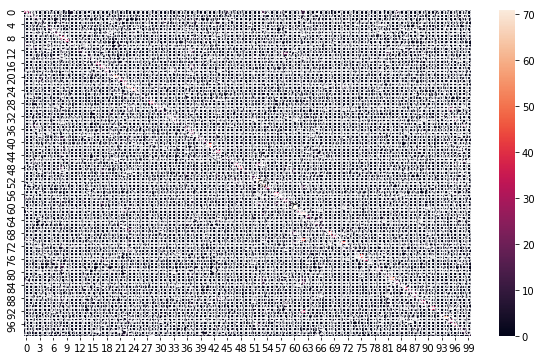

In [93]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

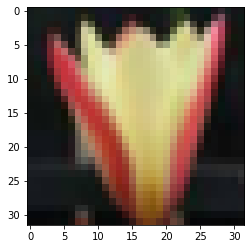

In [95]:
my_image = x_test[16]
plt.imshow(my_image)

In [96]:
y_test[16]

array([92])

In [98]:
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 20ms/step


array([[3.1855148e-03, 4.8325501e-02, 1.0076565e-02, 1.6836939e-05,
        2.0280145e-06, 9.4686379e-04, 2.4857649e-03, 5.0151590e-03,
        4.9072009e-05, 5.0051920e-03, 2.5014339e-02, 5.3113666e-03,
        3.0640520e-05, 5.7495519e-04, 1.2464862e-02, 6.5754211e-05,
        1.7541222e-03, 7.6557598e-07, 1.0284204e-03, 2.2044245e-04,
        5.2856945e-04, 1.3909040e-05, 4.3466892e-03, 4.2460952e-03,
        1.8961763e-03, 1.5904980e-02, 5.6113494e-03, 4.1111380e-05,
        2.7764053e-03, 9.3896815e-05, 2.9170963e-09, 7.5182589e-07,
        4.5204321e-03, 2.4236313e-05, 2.4494765e-04, 9.6383755e-04,
        1.1768816e-03, 2.5446134e-05, 2.4174447e-05, 2.1534023e-04,
        1.4580637e-02, 4.5938391e-04, 2.4254707e-06, 7.5477350e-05,
        3.7367758e-04, 3.2835135e-03, 9.3304057e-04, 2.6366843e-05,
        2.3125812e-04, 1.7979904e-05, 1.8303377e-04, 3.5942786e-03,
        1.3086410e-09, 2.3801516e-01, 2.8791625e-02, 1.9383468e-05,
        6.2356535e-06, 1.8376181e-02, 1.5051096e

In [99]:
def predict_classes(image):
    prediction = model.predict(image)
    return np.argmax(prediction, axis=1)

In [100]:
predict_classes(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 33ms/step


array([62])

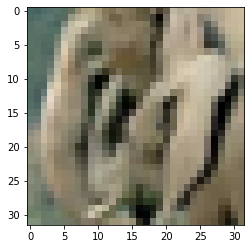

In [101]:
plt.imshow(x_test[500])

In [102]:
y_test[500]

array([31])

In [103]:
predict_classes(x_test[500].reshape(1,32,32,3))

1/1 [==============================] - 0s 30ms/step


array([88])

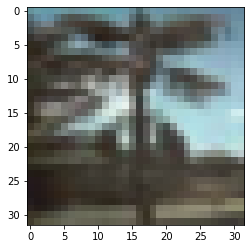

In [104]:
plt.imshow(x_test[5000])

In [105]:
y_test[5000]

array([56])

In [106]:
predict_classes(x_test[5000].reshape(1,32,32,3))

1/1 [==============================] - 0s 29ms/step


array([84])

In [107]:
model.save('cnn_acc_71.h5')

In [108]:
model_saved = tf.keras.models.load_model('cnn_acc_71.h5')

In [110]:
model_saved